In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import sys
#sys.path.insert(1, '/home/georgeos/Documents/GitHub/SyMBac//') # Not needed if you installed SyMBac using pip
sys.path.insert(1, '../SyMBac/')

from SyMBac.drawing import raster_cell, OPL_to_FL, convert_to_3D
from SyMBac.colony_simulation import ColonySimulation
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
from glob import glob
import shutil
from skimage.transform import rotate
import tifffile
from skimage.transform import rescale
import ray

/home/gh464/storage/Dropbox (Cambridge University)/projection_diffraction_frontiers_in_physics/microcolony_analysis_giant_lorentz/../SyMBac/SyMBac/colony_simulation.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
import global_params_giant_colony as global_params

['data/test_giant_colony_lorentz_PSF/1', 'data/test_giant_colony_lorentz_PSF/2', 'data/test_giant_colony_lorentz_PSF/3', 'data/test_giant_colony_lorentz_PSF/4', 'data/test_giant_colony_lorentz_PSF/5', 'data/test_giant_colony_lorentz_PSF/6', 'data/test_giant_colony_lorentz_PSF/7', 'data/test_giant_colony_lorentz_PSF/8', 'data/test_giant_colony_lorentz_PSF/9', 'data/test_giant_colony_lorentz_PSF/10']


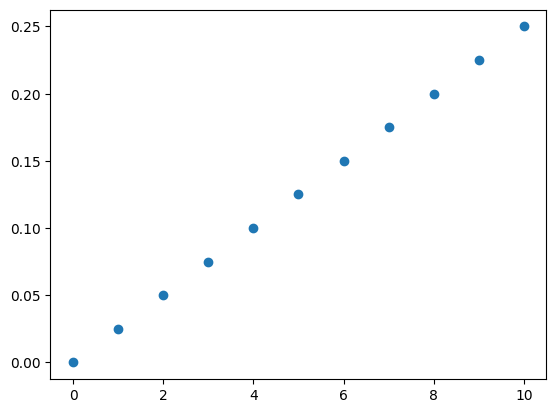

In [4]:
colonysim = ColonySimulation(
    cellmodeller_model= global_params.cellmodeller_model,
    max_cells = global_params.max_cells,
    pix_mic_conv = global_params.pix_mic_conv,
    resize_amount = global_params.resize_amount,
    save_dir = "test_giant_colony_lorentz_PSF/"
)
print(colonysim.get_simulation_dirs())
_ = (colonysim.get_simulation_pickles())
colonysim.get_max_scene_size()


mean_density_modifier = 10

n_CVs = 11
stds = np.linspace(0,2.5, n_CVs)


CVs = stds/mean_density_modifier
plt.scatter(range(len(CVs)), CVs)

In [5]:
#for std in tqdm(stds):
#    colonysim.draw_simulation_OPL(n_jobs = -1, FL=True, density = 0.1, random_distribution = "normal", distribution_args = (mean_density_modifier, std), as_3D = True, crop=True, crop_pad=50)

In [6]:
from SyMBac.colony_renderer import ColonyRenderer

In [7]:
from SyMBac.PSF import PSF_generator
from SyMBac.renderer import convolve_rescale
from skimage.util import random_noise
from scipy.ndimage import gaussian_filter

from skimage.exposure import rescale_intensity


In [8]:
try:
    os.mkdir("simulated_colonies_normal_lorentz_PSF")
    real_PSF = tifffile.imread("../cell_distance_bleedthrough/lorentzian_PSF_515nm.tiff")
    plt.imshow(real_PSF)
    my_kernel = PSF_generator(
        radius = 250, 
        wavelength = 0.515, 
        NA=1.49, 
        n = 1.518, 
        resize_amount=global_params.resize_amount, 
        pix_mic_conv=global_params.pix_mic_conv, 
        apo_sigma = 10, 
        mode="3d fluo", 
        condenser="Ph3", 
        z_height = 22,
        pz = 0.5,
        working_distance = 170
    )
    my_kernel.kernel = np.array([real_PSF]*22)
    my_renderer = ColonyRenderer(colonysim, my_kernel, force_2D = True)
    
    print(len(my_renderer.OPL_dirs))
    my_renderer.generate_random_samples(len(my_renderer.OPL_dirs), 0, f"simulated_colonies_normal_lorentz_PSF/training_data_100x_0.515_green_1.49_1.518", GPUs=[0,1], n_jobs = 2, gpu_fraction=0.5, batch_size = 50)
except:
    pass

In [9]:
my_kernel = PSF_generator(
    radius = 200, 
    wavelength = 0.515, 
    NA=1.49, 
    n = 1.518, 
    resize_amount=global_params.resize_amount, 
    pix_mic_conv=global_params.pix_mic_conv, 
    apo_sigma = 10, 
    mode="3d fluo", 
    condenser="Ph3", 
    z_height = 22,
    pz = 0.5,
    working_distance = 170
)
my_kernel.calculate_PSF()



In [10]:
import cupy as cp
from cupyx.scipy.ndimage import convolve

In [34]:
my_renderer = ColonyRenderer(colonysim, my_kernel, force_2D = False)

In [35]:
my_renderer.generate_random_samples(len(my_renderer.OPL_dirs), 0, f"simulated_colonies_normal/training_data_100x_0.515_green_1.49_1.518", n_jobs = 1)

  0%|          | 0/4576 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
convolve_rescale(a,b, rescale_factor = 1/2, rescale_int = False)